In [292]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv('data/Erin_s_flights1.csv')  

# Создание фасета "Timestamp" из столбца "Timestamp"
timestamp_facet = data['Timestamp']

# Создание фасета "City" из столбца "City"
city_facet = data['City']

# Вывод результатов
print("Timestamp facet:")
print(timestamp_facet)
print("\nCity facet:")
print(city_facet)


Timestamp facet:
0     7/16/2019 16:30:00
1     1/22/2019 16:30:00
2      7/1/2019 13:15:00
3     1/12/2019 13:03:00
4     2/13/2019 14:20:00
             ...        
87    4/15/2019 13:00:00
88     4/22/2019 7:35:00
89    4/18/2019 21:34:00
90    6/11/2019 12:33:00
91     5/22/2019 7:35:00
Name: Timestamp, Length: 92, dtype: object

City facet:
0          New York
1          New York
2            Munich
3            Munich
4            Munich
          ...      
87           London
88           Munich
89    San Francisco
90         Brussels
91           Munich
Name: City, Length: 92, dtype: object


In [293]:
# Удаление пробела из названия столбца "Activity"
data.rename(columns={'Activity ': 'Activity'}, inplace=True)

In [294]:
counts = data[data['Activity'] != ('Take off', 'Landing', 'Off boarding')].groupby('City').size().reset_index(name='EventCount')

In [295]:
data = data.merge(counts, on='City', how='left')


In [296]:
data['Facets'] = 'City:' + data['City'] + ',EventCount:' + data['EventCount'].astype(str)


In [297]:
data.head()

,Flight,Activity,Timestamp,City,EventCount,Facets
0,TR521,Take off,7/16/2019 16:30:00,New York,13,"City:New York,EventCount:13"
1,TR520,Take off,1/22/2019 16:30:00,New York,13,"City:New York,EventCount:13"
2,TR321,Take off,7/1/2019 13:15:00,Munich,46,"City:Munich,EventCount:46"
3,TR320,Take off,1/12/2019 13:03:00,Munich,46,"City:Munich,EventCount:46"
4,PR121,Take off,2/13/2019 14:20:00,Munich,46,"City:Munich,EventCount:46"


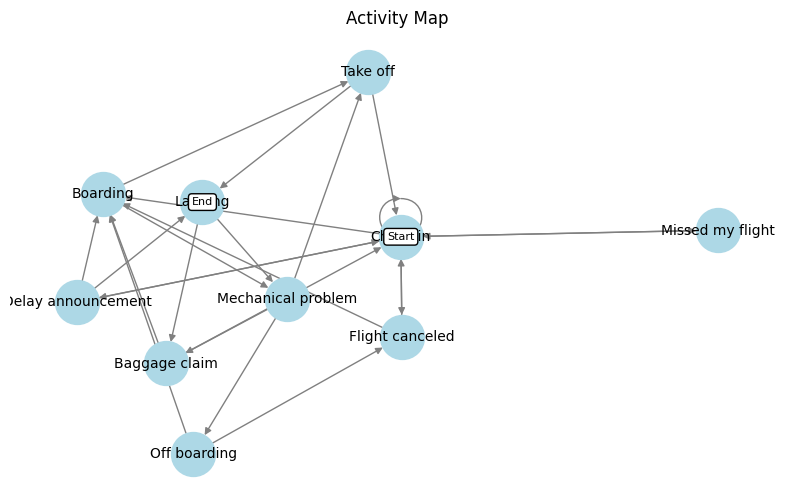

In [298]:
# Создание графа
G = nx.DiGraph()

# Сортировка данных по времени
data = data.sort_values(by='Timestamp')

# Добавление узлов графа на основе событий
for i, activity in enumerate(data['Activity']):
    G.add_node(activity)

# Добавление ребер графа на основе последовательности событий
for i in range(len(data)-1):
    source = data['Activity'].iloc[i]
    target = data['Activity'].iloc[i+1]
    G.add_edge(source, target)

# Визуализация активити-схемы
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10, edge_color='gray')
plt.title('Activity Map')
plt.axis('off')

# Добавление обозначения старта и окончания процессов
start_node = data['Activity'].iloc[0]
end_node = data['Activity'].iloc[-1]
plt.text(pos[start_node][0], pos[start_node][1], 'Start', fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
plt.text(pos[end_node][0], pos[end_node][1], 'End', fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.show()


In [299]:
# Путь к файлу CSV
csv_file = 'data/flights_delay.csv'

# Сохранение датасета в CSV
data.to_csv(csv_file, index=False)